### パッケージのインストール、ライブラリ読み込み、データ読み込み

In [38]:
# havenパッケージのインストール
install.packages("haven")
install.packages("MatchIt")
install.packages("WeightIt")
install.packages("cobalt")
install.packages("psych")
install.packages("reshape2")
install.packages("pROC") # ROC曲線描画用

# ライブラリの読み込み
library("tidyverse")
library("haven")
library("broom")
library("MatchIt")
library("WeightIt")
library("cobalt")
library("psych")
library("ggplot2")
library("reshape2")
library("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
data_check <- function(df){
  print("【形状】:")
  print(dim(df))

  print("【データ型】:")
  print(sapply(df, class))

  print("【欠損量】:")
  print(colSums(is.na(df)))

  print("【ユニーク数】:")
  print(apply(df, 2, function(x) length(unique(x))))

  print("【先頭行】:")
  print(head(df, n=5))

  print("【統計量】")
  summary(df)
}

In [40]:
# データ読み込み
nswdw_data <- read_dta("https://users.nber.org/~rdehejia/data/nsw_dw.dta")
cps1_data <- read_dta("https://users.nber.org/~rdehejia/data/cps_controls.dta")
cps3_data <- read_dta("https://users.nber.org/~rdehejia/data/cps_controls3.dta")

In [41]:
# NSWデータから介入グループだけを取り出して、cps1における介入グループとして扱う
cps1_nsw_data <- nswdw_data %>%
  filter(treat==1) %>%
  dplyr::bind_rows(cps1_data)

data_check(cps1_nsw_data)

[1] "【形状】:"
[1] 16177    11
[1] "【データ型】:"
    data_id       treat         age   education       black    hispanic 
"character"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
    married    nodegree        re74        re75        re78 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
[1] "【欠損量】:"
  data_id     treat       age education     black  hispanic   married  nodegree 
        0         0         0         0         0         0         0         0 
     re74      re75      re78 
        0         0         0 
[1] "【ユニーク数】:"
  data_id     treat       age education     black  hispanic   married  nodegree 
        2         2        40        19         2         2         2         2 
     re74      re75      re78 
     7385      7688      7383 
[1] "【先頭行】:"
# A tibble: 5 × 11
  data_id      treat   age education black hispanic married nodegree  re74  re75
  <chr>        <dbl> <dbl>     <dbl> <dbl>    <dbl>   <dbl>    <dbl> <dbl> <dbl>
1 Dehejia-Wah…     1

   data_id              treat              age          education    
 Length:16177       Min.   :0.00000   Min.   :16.00   Min.   : 0.00  
 Class :character   1st Qu.:0.00000   1st Qu.:24.00   1st Qu.:11.00  
 Mode  :character   Median :0.00000   Median :31.00   Median :12.00  
                    Mean   :0.01144   Mean   :33.14   Mean   :12.01  
                    3rd Qu.:0.00000   3rd Qu.:42.00   3rd Qu.:13.00  
                    Max.   :1.00000   Max.   :55.00   Max.   :18.00  
     black            hispanic          married          nodegree     
 Min.   :0.00000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.00000   Median :0.00000   Median :1.0000   Median :0.0000  
 Mean   :0.08234   Mean   :0.07189   Mean   :0.7058   Mean   :0.3006  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
      re74   

In [42]:
# NSWデータから介入グループだけを取り出して、cps3における介入グループとして扱う
cps3_nsw_data <- nswdw_data %>%
  filter(treat==1) %>%
  dplyr::bind_rows(cps3_data)

data_check(cps3_nsw_data)

[1] "【形状】:"
[1] 614  11
[1] "【データ型】:"
    data_id       treat         age   education       black    hispanic 
"character"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
    married    nodegree        re74        re75        re78 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
[1] "【欠損量】:"
  data_id     treat       age education     black  hispanic   married  nodegree 
        0         0         0         0         0         0         0         0 
     re74      re75      re78 
        0         0         0 
[1] "【ユニーク数】:"
  data_id     treat       age education     black  hispanic   married  nodegree 
        2         2        40        19         2         2         2         2 
     re74      re75      re78 
      358       356       457 
[1] "【先頭行】:"
# A tibble: 5 × 11
  data_id      treat   age education black hispanic married nodegree  re74  re75
  <chr>        <dbl> <dbl>     <dbl> <dbl>    <dbl>   <dbl>    <dbl> <dbl> <dbl>
1 Dehejia-Wah…     1    

   data_id              treat             age          education    
 Length:614         Min.   :0.0000   Min.   :16.00   Min.   : 0.00  
 Class :character   1st Qu.:0.0000   1st Qu.:20.00   1st Qu.: 9.00  
 Mode  :character   Median :0.0000   Median :25.00   Median :11.00  
                    Mean   :0.3013   Mean   :27.36   Mean   :10.27  
                    3rd Qu.:1.0000   3rd Qu.:32.00   3rd Qu.:12.00  
                    Max.   :1.0000   Max.   :55.00   Max.   :18.00  
     black           hispanic         married          nodegree     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.3958   Mean   :0.1173   Mean   :0.4153   Mean   :0.6303  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      re74            re75        

In [43]:
print(head(nswdw_data, 5))
print(head(cps1_nsw_data, 5))
print(head(cps3_nsw_data, 5))

# A tibble: 5 × 11
  data_id      treat   age education black hispanic married nodegree  re74  re75
  <chr>        <dbl> <dbl>     <dbl> <dbl>    <dbl>   <dbl>    <dbl> <dbl> <dbl>
1 Dehejia-Wah…     1    37        11     1        0       1        1     0     0
2 Dehejia-Wah…     1    22         9     0        1       0        1     0     0
3 Dehejia-Wah…     1    30        12     1        0       0        0     0     0
4 Dehejia-Wah…     1    27        11     1        0       0        1     0     0
5 Dehejia-Wah…     1    33         8     1        0       0        1     0     0
# ℹ 1 more variable: re78 <dbl>
# A tibble: 5 × 11
  data_id      treat   age education black hispanic married nodegree  re74  re75
  <chr>        <dbl> <dbl>     <dbl> <dbl>    <dbl>   <dbl>    <dbl> <dbl> <dbl>
1 Dehejia-Wah…     1    37        11     1        0       1        1     0     0
2 Dehejia-Wah…     1    22         9     0        1       0        1     0     0
3 Dehejia-Wah…     1    30        12   

### RCTでの評価

In [44]:
# RCTデータであるnswdw_dataで回帰分析

# ナイーブな推定: グループ間の平均の比較
tau_nsw_naive <- mean(filter(nswdw_data, treat==1)$re78) - mean(filter(nswdw_data, treat==0)$re78)
paste("nswdw_dataのナイーブな推定効果: ", tau_nsw_naive)

# 共変量なしの回帰分析
nsw_nocov <- lm(data = nswdw_data,
formula = re78 ~ treat) %>%
  tidy() # t検定などの結果を省略。各変数について、推定効果、標準誤差、t値, p値。
print(nsw_nocov)

# 共変量ありの回帰分析
nsw_cov <- lm(data = nswdw_data,
formula = re78 ~ treat + age + black + hispanic + married +
  nodegree + education + re74 + re75) %>%
  tidy() # t検定などの結果を省略
print(nsw_cov)

# 共変量ありに注目。介入により$1,676の収入アップ効果があることを示す。
# 統計的な妥当性としては、有意水準0.05 > p値0.00898であり、有意であると判断する。

[1] "nswdw_dataのナイーブな推定効果:  1794.3423818501"

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)    4555.      408.     11.2  1.15e-25
2 treat          1794.      633.      2.84 4.79e- 3
# A tibble: 10 × 5
   term          estimate std.error statistic p.value
   <chr>            <dbl>     <dbl>     <dbl>   <dbl>
 1 (Intercept)   785.     3375.        0.233  0.816  
 2 treat        1676.      639.        2.62   0.00898
 3 age            55.3      45.3       1.22   0.223  
 4 black       -2160.     1169.       -1.85   0.0654 
 5 hispanic      164.     1549.        0.106  0.916  
 6 married      -139.      880.       -0.158  0.875  
 7 nodegree      -70.7    1004.       -0.0704 0.944  
 8 education     396.      227.        1.74   0.0825 
 9 re74            0.0821    0.0774    1.06   0.289  
10 re75            0.0528    0.135     0.389  0.697  


### バイアスデータで回帰分析

In [45]:
# ナイーブな推定: グループ間の平均の比較
tau_cps1_naive <- mean(filter(cps1_nsw_data, treat==1)$re78) - mean(filter(cps1_nsw_data, treat==0)$re78)
tau_cps3_naive <- mean(filter(cps3_nsw_data, treat==1)$re78) - mean(filter(cps3_nsw_data, treat==0)$re78)

paste("cps1_nsw_dataのナイーブな推定効果: ", tau_cps1_naive)
paste("cps3_nsw_dataのナイーブな推定効果: ", tau_cps3_naive)

[1] "cps1_nsw_dataのナイーブな推定効果:  -8497.51614813298"

[1] "cps3_nsw_dataのナイーブな推定効果:  -635.026250406911"

In [46]:
# 回帰分析
cps1_reg <- lm(data = cps1_nsw_data,
formula = re78 ~ treat + age + black + hispanic + married +
  nodegree + education + re74 + re75) %>%
    tidy()

cps3_reg <- lm(data = cps3_nsw_data,
formula = re78 ~ treat + age + black + hispanic + married +
  nodegree + education + re74 + re75) %>%
    tidy()

print(cps1_reg)
print(cps3_reg)

# cps1_nsw_dataの介入効果は$699とRCTと比べてかなり差がある
# 介入データがかなり少ないこと および データの分布が異なる。
# NSWはそもそも介入(職業訓練)の必要性がある人たちを対象にRCTを行ったが、CPS1はそうでは無い。
# そのため、類似サンプル内において介入・非介入の偏りがあったり、
# サンプル間で効果が非線形であることが考えられる。
# つまり、効果推定を行うデータセットの分布が異なるため乖離が大きいと考えられる。
# この状態のデータセットでは、回帰分析の計算の仕組み上うまく推定ができない。
# その介入によって、どういった特徴や前提のあるデータを対象に効果推定したいのかを設定して、
# それに沿う様にデータセットの作成・準備、分析をする必要がある。

# A tibble: 10 × 5
   term        estimate std.error statistic   p.value
   <chr>          <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept) 5736.     445.        12.9   8.48e- 38
 2 treat        699.     548.         1.28  2.02e-  1
 3 age         -102.       5.88     -17.3   1.33e- 66
 4 black       -837.     213.        -3.93  8.44e-  5
 5 hispanic    -218.     219.        -0.998 3.18e-  1
 6 married       73.1    142.         0.513 6.08e-  1
 7 nodegree     372.     178.         2.10  3.61e-  2
 8 education    160.      28.6        5.60  2.15e-  8
 9 re74           0.289    0.0121    24.0   1.26e-124
10 re75           0.471    0.0122    38.7   2.28e-313
# A tibble: 10 × 5
   term         estimate std.error statistic     p.value
   <chr>           <dbl>     <dbl>     <dbl>       <dbl>
 1 (Intercept)    66.5   2437.        0.0273 0.978      
 2 treat        1548.     781.        1.98   0.0480     
 3 age            13.0     32.5       0.399  0.690      
 4 black       -1241.     769

### 傾向スコアの集計と可視化

In [47]:
# glmで傾向スコア算出
ps_model_cps1 <- glm(data = cps1_nsw_data,
formula = treat ~ age + black + hispanic + married +
  nodegree + education + re74 + re75,
  family = binomial # ロジスティック回帰を指定
  )
summary(ps_model_cps1)

ps_model_cps3 <- glm(data = cps3_nsw_data,
formula = treat ~ age + black + hispanic + married +
  nodegree + education + re74 + re75,
  family = binomial # ロジスティック回帰を指定
  )
summary(ps_model_cps3)

# fitted.valuesで傾向スコア取得
ps_cps1 <- ps_model_cps1$fitted.values
ps_cps3 <- ps_model_cps3$fitted.values

# データフレームに傾向スコア追加
cps1_nsw_data$ps <- c(ps_cps1)
cps3_nsw_data$ps <- c(ps_cps3)


Call:
glm(formula = treat ~ age + black + hispanic + married + nodegree + 
    education + re74 + re75, family = binomial, data = cps1_nsw_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.605e+00  7.799e-01  -7.187 6.61e-13 ***
age         -3.778e-03  9.794e-03  -0.386    0.700    
black        4.207e+00  2.579e-01  16.315  < 2e-16 ***
hispanic     1.794e+00  3.909e-01   4.589 4.46e-06 ***
married     -9.899e-01  2.346e-01  -4.219 2.45e-05 ***
nodegree     1.036e+00  2.640e-01   3.923 8.75e-05 ***
education    3.458e-02  4.690e-02   0.737    0.461    
re74        -2.925e-05  2.714e-05  -1.078    0.281    
re75        -2.118e-04  3.591e-05  -5.897 3.70e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2022.1  on 16176  degrees of freedom
Residual deviance: 1004.1  on 16168  degrees of freedom
AIC: 1022.1

Number of Fisher Scoring iterations: 1


Call:
glm(formula = treat ~ age + black + hispanic + married + nodegree + 
    education + re74 + re75, family = binomial, data = cps3_nsw_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.729e+00  1.017e+00  -4.649 3.33e-06 ***
age          1.578e-02  1.358e-02   1.162  0.24521    
black        3.065e+00  2.865e-01  10.699  < 2e-16 ***
hispanic     9.836e-01  4.257e-01   2.311  0.02084 *  
married     -8.321e-01  2.903e-01  -2.866  0.00415 ** 
nodegree     7.073e-01  3.377e-01   2.095  0.03620 *  
education    1.613e-01  6.513e-02   2.477  0.01325 *  
re74        -7.178e-05  2.875e-05  -2.497  0.01253 *  
re75         5.345e-05  4.635e-05   1.153  0.24884    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 751.49  on 613  degrees of freedom
Residual deviance: 487.84  on 605  degrees of freedom
AIC: 505.84

Number of Fisher Scoring iterations: 5


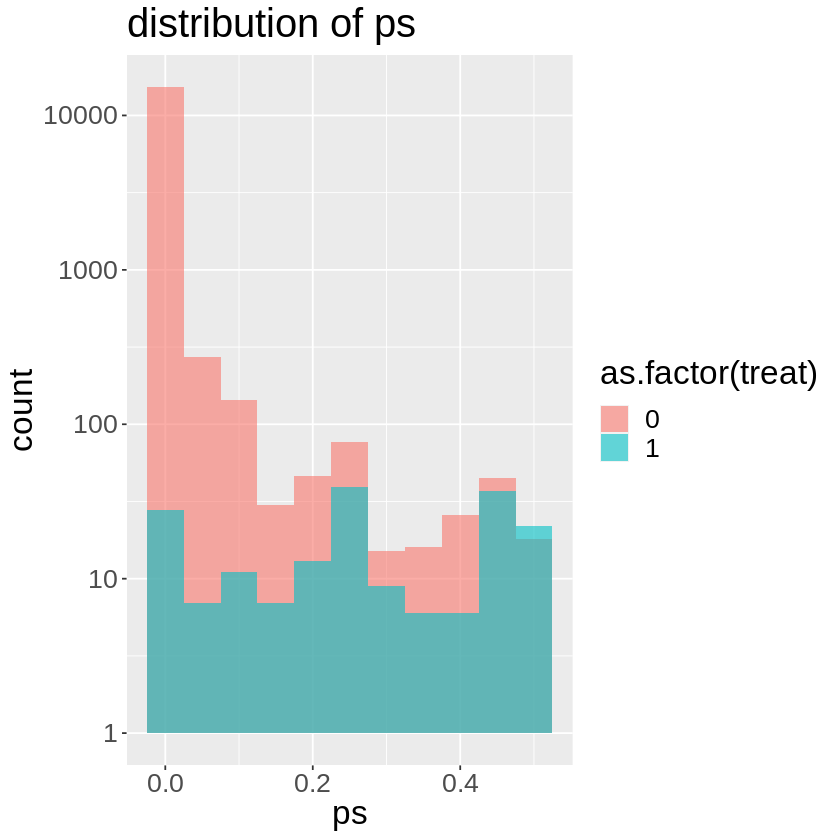

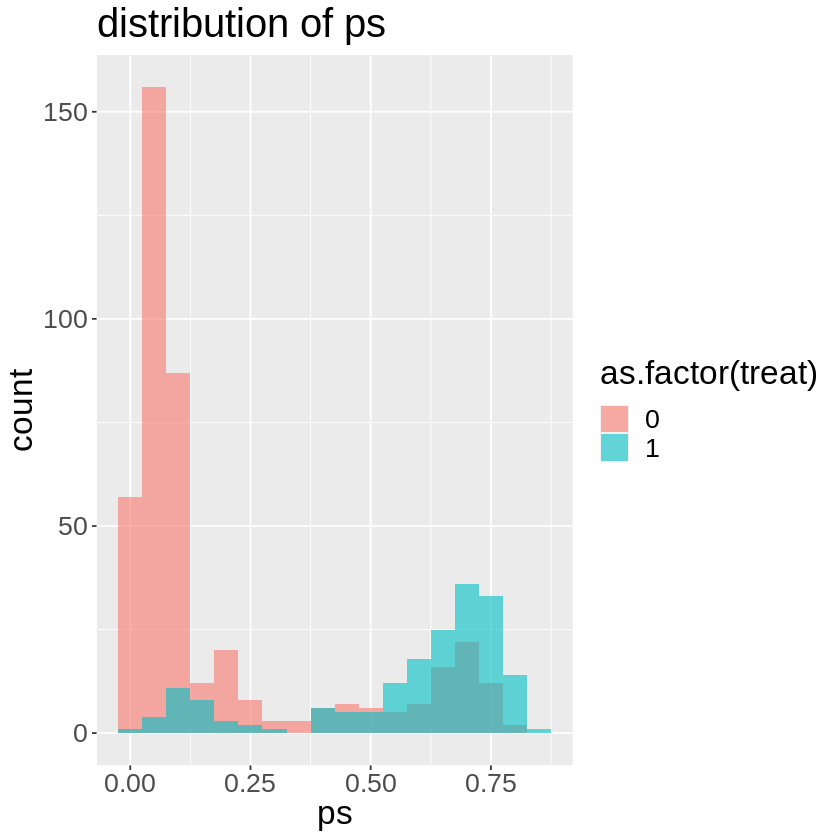

In [48]:
# ヒストグラム描画
ggplot(cps1_nsw_data, aes(x=ps, fill=as.factor(treat))) +
  geom_histogram(position = "identity", alpha=0.6, binwidth=0.05) +
  scale_y_log10() +
  ggtitle("distribution of ps") +
  theme(text=element_text(size=20))

ggplot(cps3_nsw_data, aes(x=ps, fill=as.factor(treat))) +
  geom_histogram(position = "identity", alpha=0.6, binwidth=0.05) +
  # scale_y_log10() +
  ggtitle("distribution of ps") +
  theme(text=element_text(size=20))

# マッチングだと傾向スコアが高い or 低い人たちが除かれてしまうがいいのか

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = treat ~ ps, data = cps1_nsw_data)

Data: ps in 15992 controls (treat 0) < 185 cases (treat 1).
Area under the curve: 0.9709

Call:
roc.formula(formula = treat ~ ps, data = cps3_nsw_data)

Data: ps in 429 controls (treat 0) < 185 cases (treat 1).
Area under the curve: 0.8742


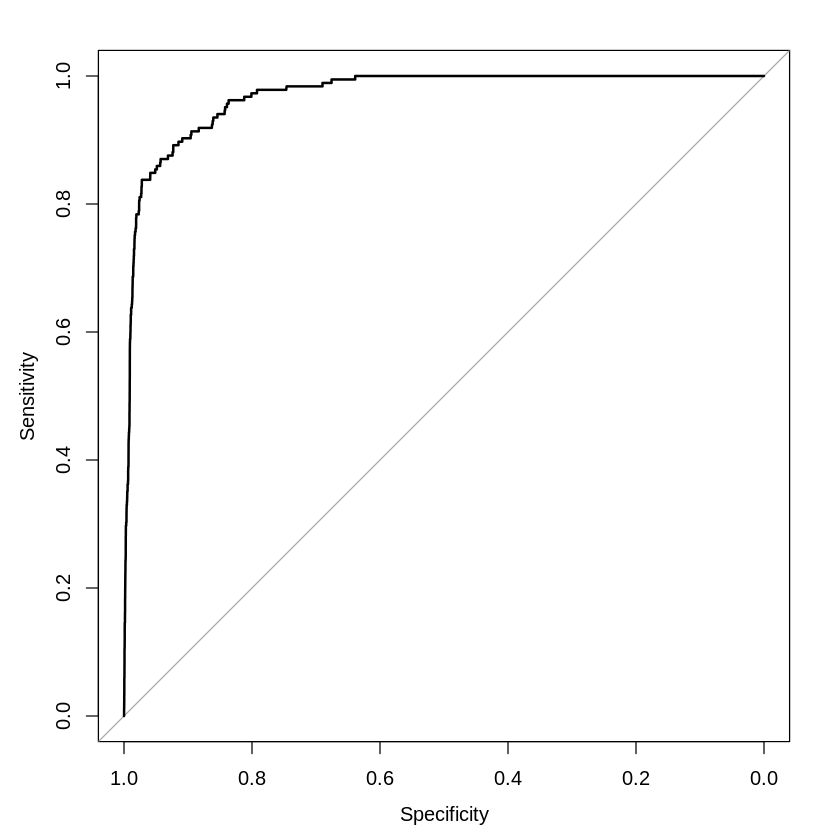

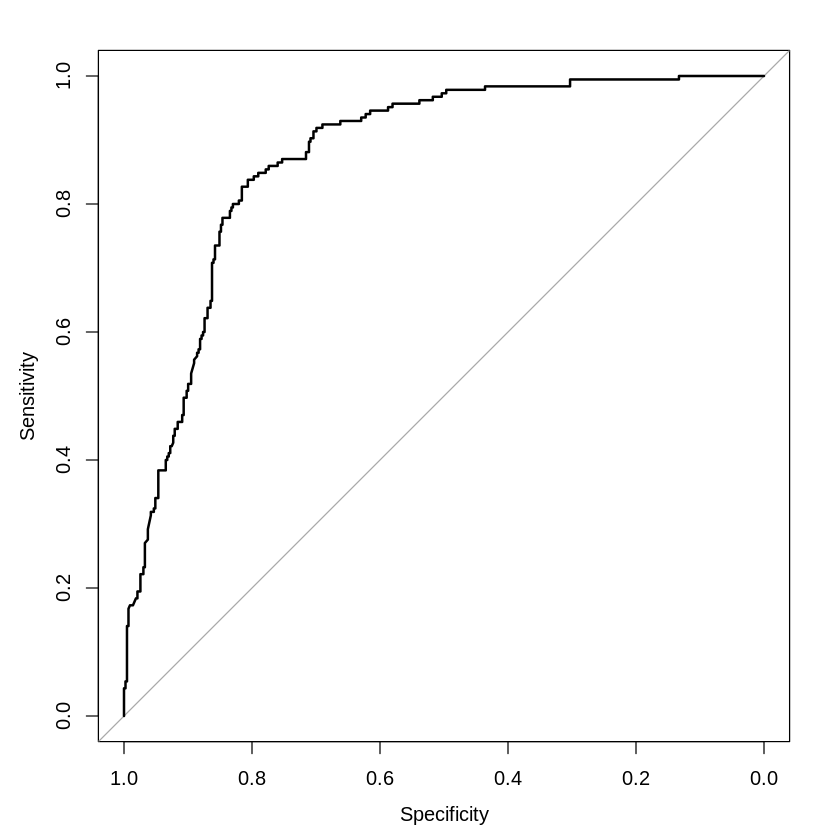

In [49]:
# c統計量(AUC)
# ROC曲線で評価
ROC1 <- roc(treat ~ ps, data=cps1_nsw_data)
ROC3 <- roc(treat ~ ps, data=cps3_nsw_data)

# AUC出力
print(ROC1)
print(ROC3)

# ROC曲線描画
plot(ROC1)
plot(ROC3)

# cps1の方がAUCが高く、一見分類機として性能が良さそうだが
# cps1_nsw_dataの方がtreat1の精度が低いが、treat0が傾向スコアが低いところに
# 集中していて精度が良い(データの偏り的に当たり前といえば当たり前な気もする)ので、
# ヒストグラムからくる直感とは異なる結果になった。

### バイアスデータに傾向スコアマッチングを用いたATTの推定


In [50]:
# glm()で算出した傾向スコアと差があるか確認。

# matchitで傾向スコア算出
m_near_cps1 <- matchit(data = cps1_nsw_data,
formula = treat ~ age + black + hispanic + married +
  nodegree + education + re74 + re75,
  method="nearest")
cps1_nsw_data$ps_match <- c(m_near_cps1$distance)

# glm()で算出した傾向スコアとの差
sum(abs(cps1_nsw_data$ps - cps1_nsw_data$ps_match))

# OK

[1] 0

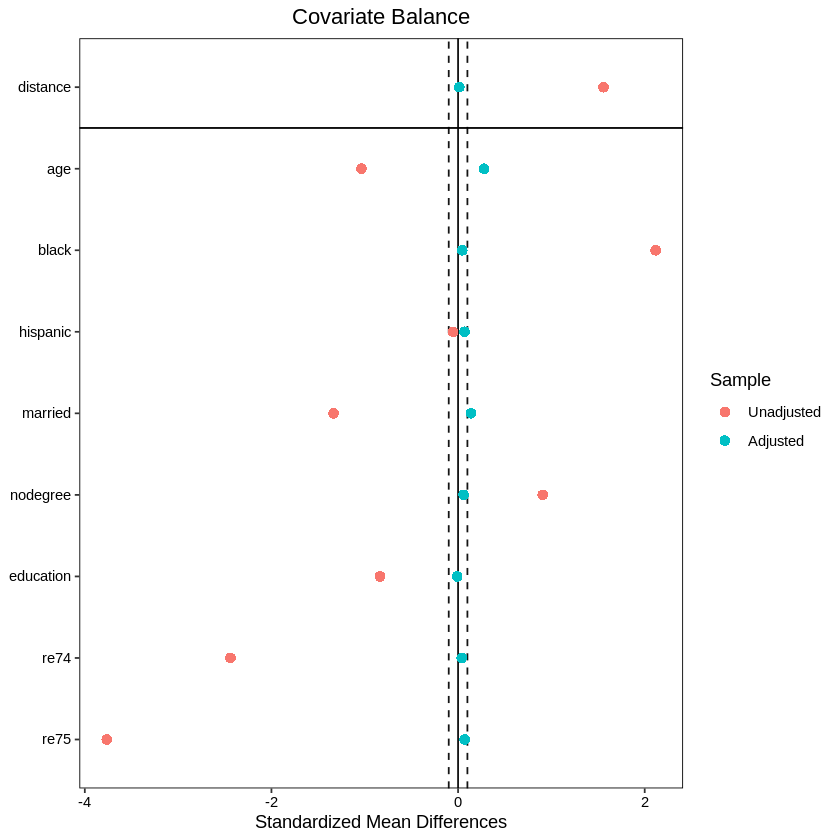

In [51]:
# バランシングの評価
love.plot(m_near_cps1, threshold = 0.1, binary="std")

# 今回のマッチング方法である最近隣法マッチングによる非復元1対1マッチングは批判されているが、
# バランシングが悪くないのでOKと考える

In [52]:
# ASAMの検算用の関数
standardized_mean_error <- function(df, col){

  # ベクトルで値を抽出
  values_treat0 <- filter(df, treat==0)[[col]]
  values_treat1 <- filter(df, treat==1)[[col]]

  # サンプルサイズ
  n_0 <- length(values_treat0)
  n_1 <- length(values_treat1)

  # 平均
  mean_0 <- mean(values_treat0)
  mean_1 <- mean(values_treat1)

  # 分散
  s2 <- function(x){ var(x)*(length(x)-1)/length(x) }
  var_0 <- s2(values_treat0)
  var_1 <- s2(values_treat1)

  # 標準平均化誤差
  m_diff <- mean_1 - mean_0
  s_co <- (var_1*(n_1 - 1) + var_0*(n_0 - 1)) / (n_1 + n_0 - 2)

  return ( m_diff / sqrt(s_co) )
}

In [53]:
# 調整後データ
matched1_data <- match.data(m_near_cps1)

cols_li <- c("age", "black", "hispanic", "married", "nodegree", "education", "re74", "re75")
for (col in cols_li){
  print(paste(col, "のASAM"))
  print(paste("調整前: ", standardized_mean_error(cps1_nsw_data, col)))
  print(paste("調整後: ", standardized_mean_error(matched1_data, col)))
}

# 検算したがlove.plotと合わない
# いくつかドキュメントも確認したが、数式が見つからず確かめられなかった。
# 調整後の方が小さいのでとりあえず今回はOK
# 調整はうまくできている

[1] "age のASAM"
[1] "調整前:  -0.673045077618078"
[1] "調整後:  0.2435367704803"
[1] "black のASAM"
[1] "調整前:  2.93324709421367"
[1] "調整後:  0.0437130189471938"
[1] "hispanic のASAM"
[1] "調整前:  -0.0486883897274181"
[1] "調整後:  0.0735214622093808"
[1] "married のASAM"
[1] "調整前:  -1.1552824924244"
[1] "調整後:  0.147042924418762"
[1] "nodegree のASAM"
[1] "調整前:  0.903320101340552"
[1] "調整後:  0.0587058294730288"
[1] "education のASAM"
[1] "調整前:  -0.587471521697691"
[1] "調整後:  -0.00913489647323476"
[1] "re74 のASAM"
[1] "調整前:  -1.25103406168653"
[1] "調整後:  0.0462501126863007"
[1] "re75 のASAM"
[1] "調整前:  -1.31388559386733"
[1] "調整後:  0.0834656684538306"


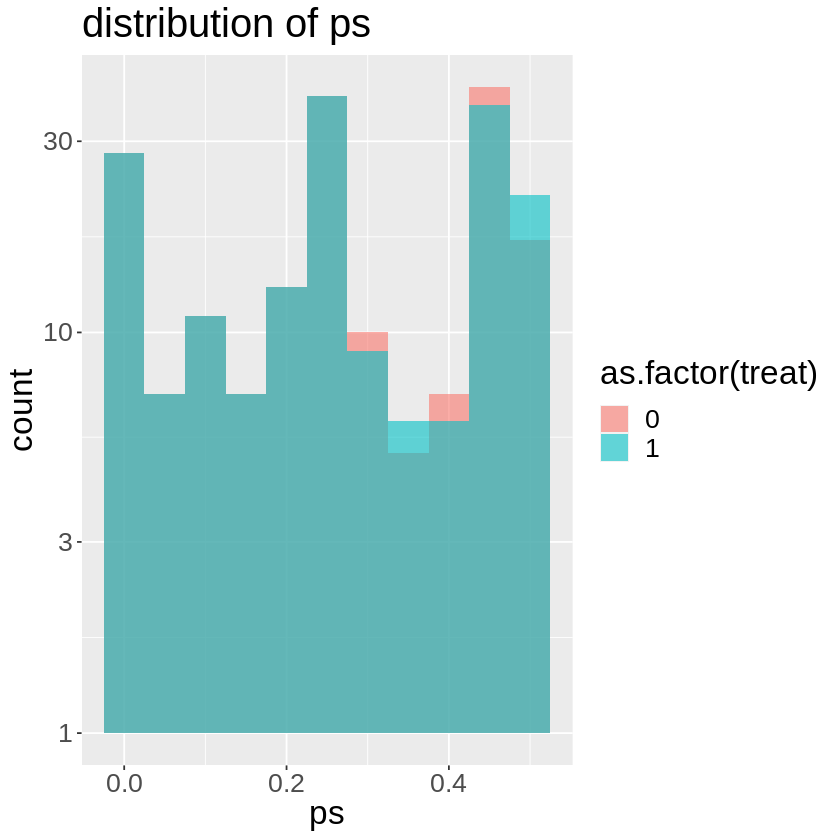

# A tibble: 10 × 5
   term         estimate std.error statistic p.value
   <chr>           <dbl>     <dbl>     <dbl>   <dbl>
 1 (Intercept)  426.      3479.       0.122   0.903 
 2 treat       1625.       721.       2.26    0.0247
 3 age           -9.10      48.3     -0.188   0.851 
 4 black       -746.      1150.      -0.649   0.517 
 5 hispanic    1504.      1933.       0.778   0.437 
 6 married      361.      1062.       0.340   0.734 
 7 nodegree     274.      1104.       0.248   0.804 
 8 education    421.       215.       1.96    0.0510
 9 re74          -0.0110     0.111   -0.0996  0.921 
10 re75           0.312      0.165    1.89    0.0598


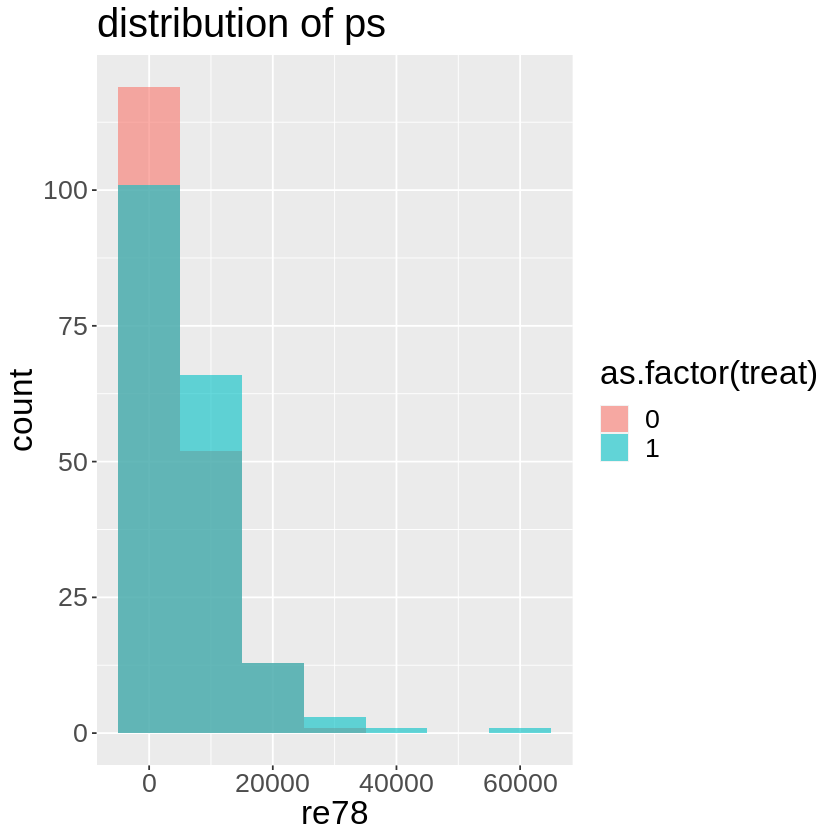

In [54]:
# cps1_nsw_dataの分析
# 調整後データでヒストグラム描画

# 傾向スコア
ggplot(matched1_data, aes(x=ps, fill=as.factor(treat))) +
  geom_histogram(position = "identity", alpha=0.6, binwidth=0.05) +
  scale_y_log10() +
  ggtitle("distribution of ps") +
  theme(text=element_text(size=20))

# re78
ggplot(matched1_data, aes(x=re78, fill=as.factor(treat))) +
  geom_histogram(position = "identity", alpha=0.6, binwidth=10000) +
  # scale_y_log10() +
  ggtitle("distribution of ps") +
  theme(text=element_text(size=20))

# 回帰分析で効果推定(解析モデルにも共変量を使用)
psm1_co_result <- lm(data = matched1_data,
formula = re78 ~ treat + age + black + hispanic + married +
  nodegree + education + re74 + re75) %>%
  tidy()

print(psm1_co_result)

# 介入により$1,625の収入アップ効果があることを示しており、RCTの$1,676と近い値。
# 調整前の$699と比べてかなり改善
# 統計的な妥当性としては、有意水準0.05 > p値0.0180であり、優位であると判断する。

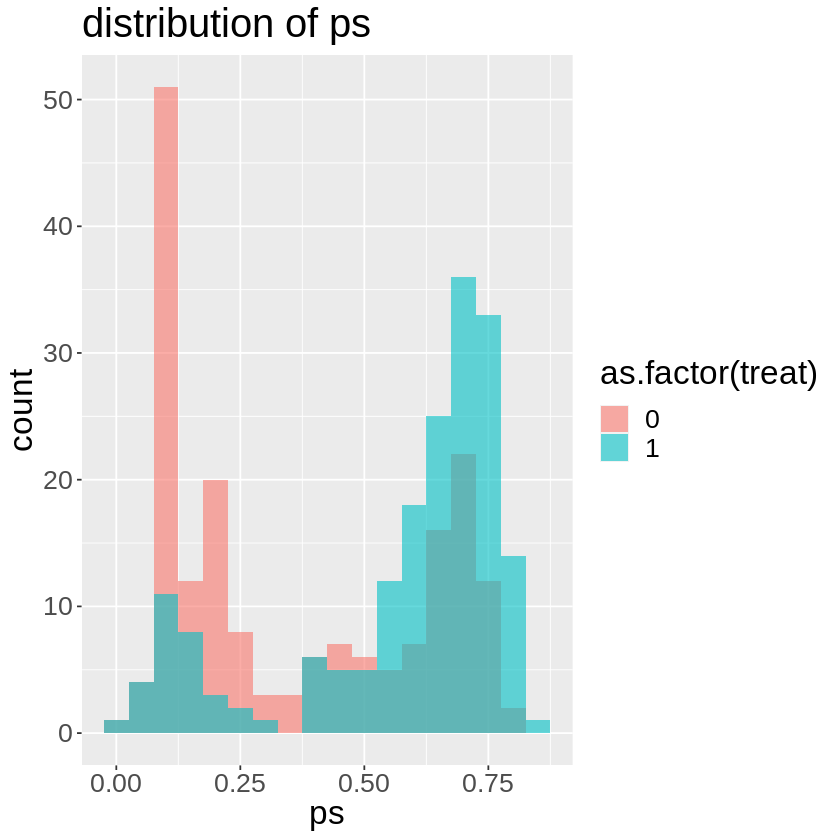

# A tibble: 10 × 5
   term          estimate std.error statistic p.value
   <chr>            <dbl>     <dbl>     <dbl>   <dbl>
 1 (Intercept) -2112.      3512.       -0.601 0.548  
 2 treat        1345.       790.        1.70  0.0894 
 3 age             7.80      42.9       0.182 0.856  
 4 black        -469.      1010.       -0.465 0.642  
 5 hispanic     1064.      1300.        0.818 0.414  
 6 married      -158.       986.       -0.160 0.873  
 7 nodegree      923.      1110.        0.832 0.406  
 8 education     602.       224.        2.69  0.00753
 9 re74            0.0264     0.103     0.256 0.798  
10 re75            0.221      0.160     1.38  0.168  


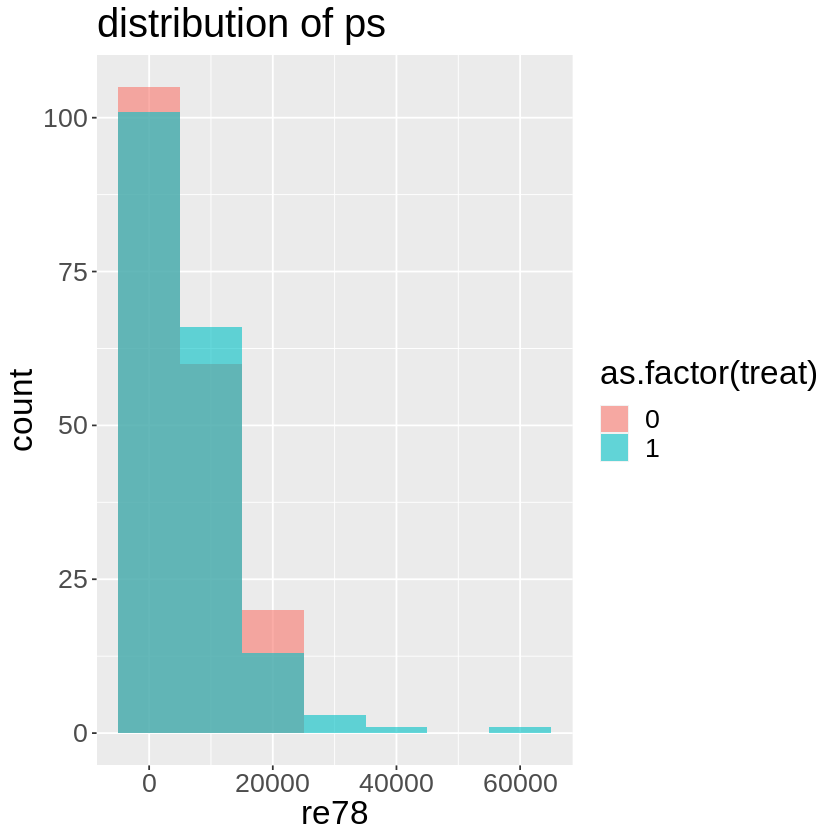

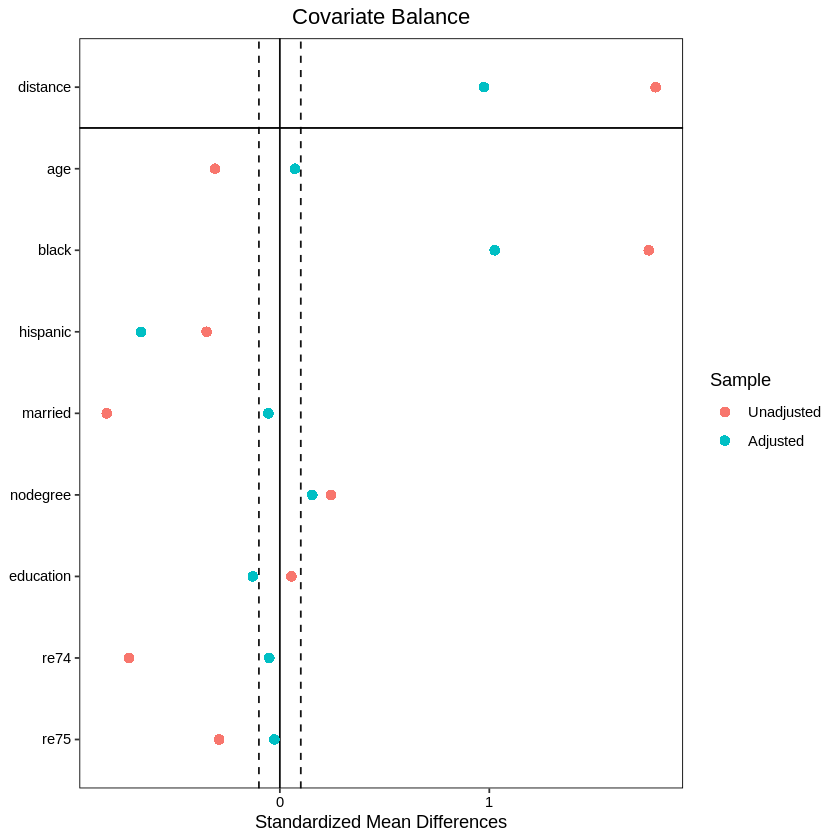

In [55]:
# m_near_cps3についても傾向スコアマッチング
m_near_cps3 <- matchit(data = cps3_nsw_data,
formula = treat ~ age + black + hispanic + married +
  nodegree + education + re74 + re75,
  method="nearest")

# 調整後データ
matched3_data <- match.data(m_near_cps3)

# 調整後データでヒストグラム描画

# 傾向スコア
ggplot(matched3_data, aes(x=ps, fill=as.factor(treat))) +
  geom_histogram(position = "identity", alpha=0.6, binwidth=0.05) +
  # scale_y_log10() +
  ggtitle("distribution of ps") +
  theme(text=element_text(size=20))

# re78
ggplot(matched3_data, aes(x=re78, fill=as.factor(treat))) +
  geom_histogram(position = "identity", alpha=0.6, binwidth=10000) +
  # scale_y_log10() +
  ggtitle("distribution of ps") +
  theme(text=element_text(size=20))

# 回帰分析(解析モデルにも共変量を使用)
psm3_co_result <- lm(data = matched3_data,
formula = re78 ~ treat + age + black + hispanic + married +
  nodegree + education + re74 + re75) %>%
  tidy()

print(psm3_co_result)

# バランシングの評価
love.plot(m_near_cps3, threshold = 0.1, binary="std")

# cps3_nsw_dataは回帰分析と比べて結果が改悪
# よいマッチング相手がなかったのかもしれない。というのは、
#   調整前データ自体がかなり絞られていた
#   調整前の傾向スコアの高い領域で介入群の方が多く、傾向スコアの似たサンプルと一致の具合が十分で無かった
# 対照群もcps1と比べると、少ない別データからマッチングさせたものであり、cps3データ作成時の抽出基準が
# そこまで適しているわけでなかったのかもしれない
# -> 傾向スコアマッチングでのATT推定は、対照群のデータが豊富で多様性のある時の方が良いかもしれない

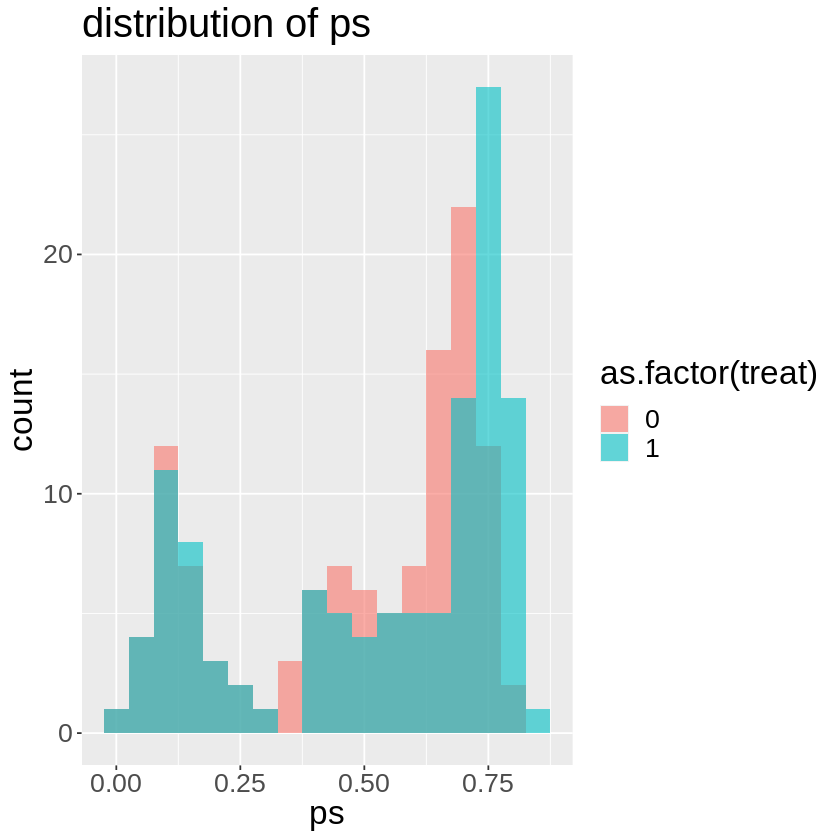

# A tibble: 10 × 5
   term          estimate std.error statistic p.value
   <chr>            <dbl>     <dbl>     <dbl>   <dbl>
 1 (Intercept) -1716.      4417.      -0.389   0.698 
 2 treat        1887.       962.       1.96    0.0510
 3 age            -2.52      54.6     -0.0462  0.963 
 4 black        -613.      1335.      -0.459   0.647 
 5 hispanic     -987.      1956.      -0.504   0.615 
 6 married       591.      1257.       0.470   0.639 
 7 nodegree     1613.      1413.       1.14    0.255 
 8 education     531.       284.       1.87    0.0628
 9 re74            0.0809     0.120    0.675   0.500 
10 re75            0.143      0.186    0.772   0.441 


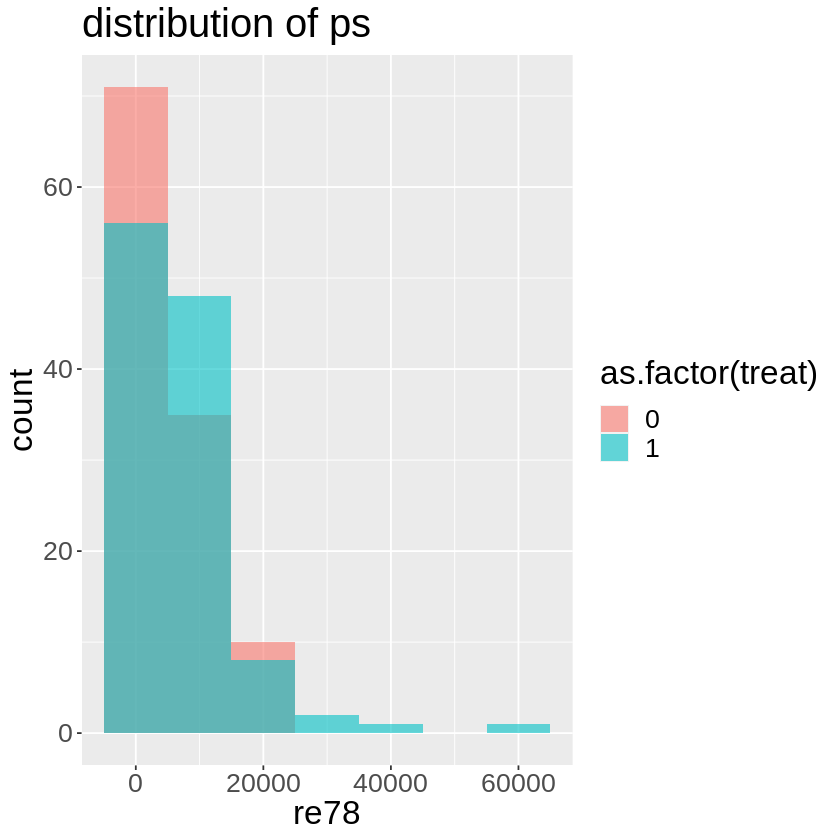

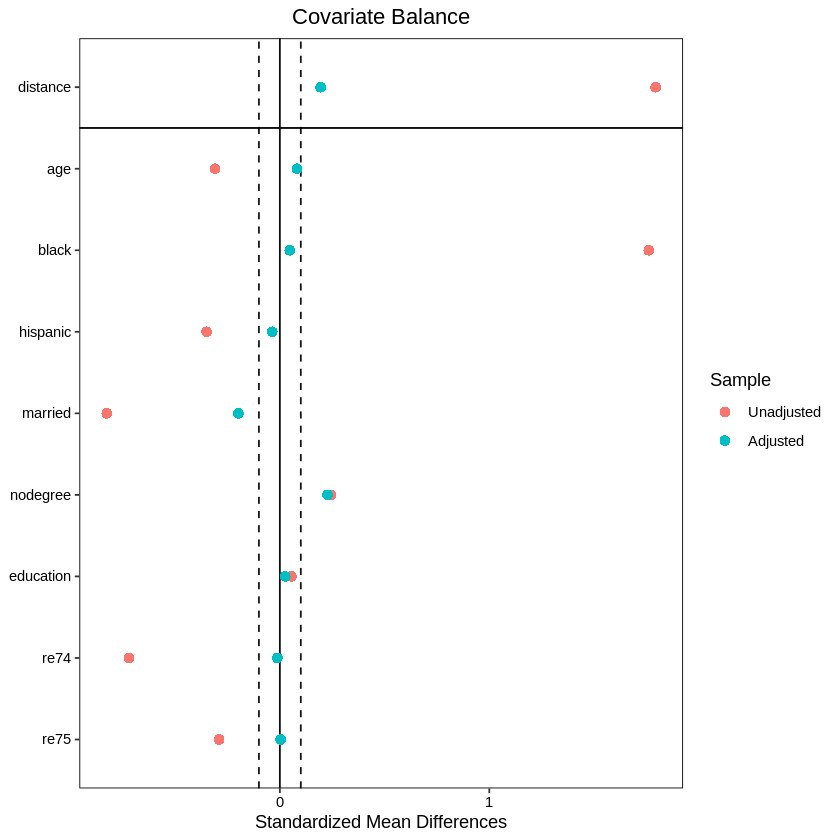

In [56]:
# m_near_cps3についても傾向スコアマッチング。Caliper使用
m_near_cps3 <- matchit(data = cps3_nsw_data,
formula = treat ~ age + black + hispanic + married +
  nodegree + education + re74 + re75,
  caliper=0.25,
  method="nearest")

# 調整後データ
matched3_data <- match.data(m_near_cps3)

# 調整後データでヒストグラム描画

# 傾向スコア
ggplot(matched3_data, aes(x=ps, fill=as.factor(treat))) +
  geom_histogram(position = "identity", alpha=0.6, binwidth=0.05) +
  # scale_y_log10() +
  ggtitle("distribution of ps") +
  theme(text=element_text(size=20))

# re78
ggplot(matched3_data, aes(x=re78, fill=as.factor(treat))) +
  geom_histogram(position = "identity", alpha=0.6, binwidth=10000) +
  # scale_y_log10() +
  ggtitle("distribution of ps") +
  theme(text=element_text(size=20))


# 回帰分析(解析モデルにも共変量を使用)
psm3_co_result <- lm(data = matched3_data,
formula = re78 ~ treat + age + black + hispanic + married +
  nodegree + education + re74 + re75) %>%
  tidy()

print(psm3_co_result)

# バランシングの評価
love.plot(m_near_cps3, threshold = 0.1, binary="std")

# caliperを設定することで改善。基本caliperは設定する方が良い。

### バイアスデータにIPTWを用いたATT, ATEの推定

##### 効果推定

In [57]:
weighting1 <- weightit(data=cps1_nsw_data,
formula = treat ~ age + black + hispanic + married +
  nodegree + education + re74 + re75,
  method="ps",
  estimand = "ATE")

In [58]:
# 重みを追加
cps1_nsw_data$weights <- weighting1$weights
head(cps1_nsw_data, 5)

data_id,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78,ps,ps_match,weights
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dehejia-Wahba Sample,1,37,11,1,0,1,1,0,0,9930.0459,0.24751114,0.24751114,4.040222
Dehejia-Wahba Sample,1,22,9,0,1,0,1,0,0,3595.8940,0.07257909,0.07257909,13.778073
Dehejia-Wahba Sample,1,30,12,1,0,0,0,0,0,24909.4492,0.25039795,0.25039795,3.993643
Dehejia-Wahba Sample,1,27,11,1,0,0,1,0,0,7506.1460,0.47895432,0.47895432,2.087882
Dehejia-Wahba Sample,1,33,8,1,0,0,1,0,0,289.7899,0.44753066,0.44753066,2.234484


In [59]:
# weightitで算出した重みがglm()で算出した傾向スコアと差があるか確認。

# 対照群の確認
print(nrow(filter(cps1_nsw_data, treat==0))
- sum(filter(cps1_nsw_data, treat==0)$ps + 1 / filter(cps1_nsw_data, treat==0)$weights))

# 介入群の確認
print(sum(filter(cps1_nsw_data, treat==1)$ps - 1 / filter(cps1_nsw_data, treat==1)$weights))

# OK

[1] 0
[1] -1.126529e-13


Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the `stars` argument to distinguish between them and appropriately label the x-axis.”


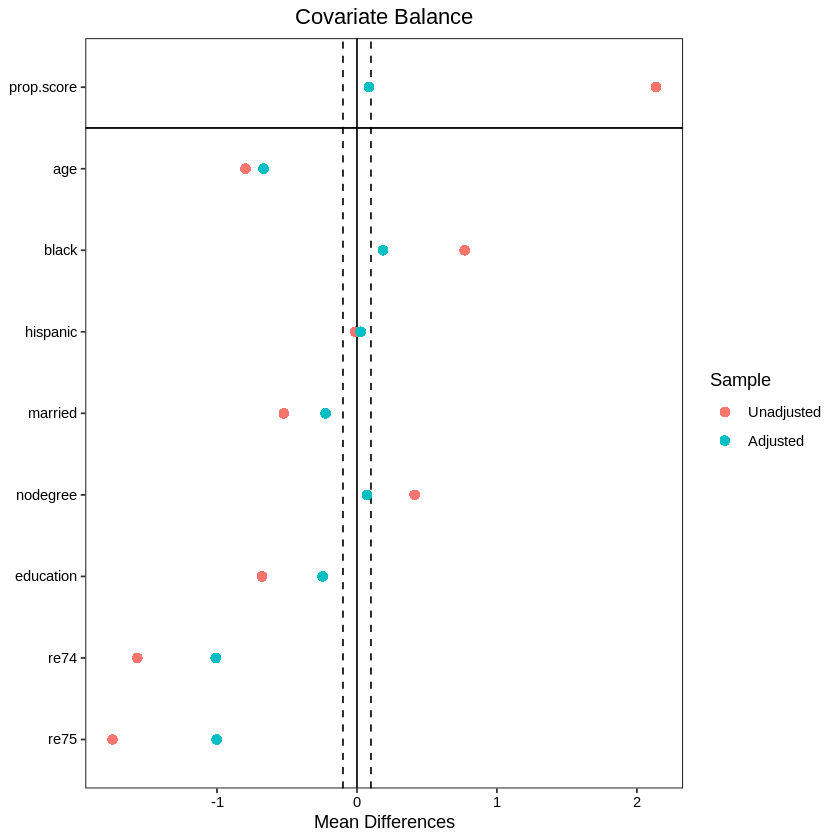

In [60]:
# バランシングの評価
love.plot(weighting1, threshold=0.1)

# 調整前が傾向スコアマッチングの時と値が変わっている。
#  -> love.plotの挙動がよくわからない。

In [61]:
# IPTWで調整後のASAM
# 傾向スコアから算出される重みのカラムは作成しておく
standardized_mean_error_weighted <- function(df, weights, col, multiple=10){

  # 重みのぶんだけ増やすレコード数のカラム作成(今回は重みの10倍)
  df$weights_multiplied <- cps1_nsw_data[[weights]]*multiple

  # 介入群の調整後のベクトル作成
  df_1 <- filter(df, treat==1)
  weighted_values1 <- vector()
  for (i in 1:nrow(df_1)){
    repeated_value1 <- df_1[[col]][i]
    repeat_num1 <- round(df_1[["weights_multiplied"]][i])
    weighted_values1 <- append(weighted_values1, rep(repeated_value1, repeat_num1))
    }

  # 対照群の調整後のベクトル作成
  df_0 <- filter(df, treat==0)
  weighted_values0 <- vector()
  for (i in 1:nrow(df_0)){
    repeated_value0 <- df_0[[col]][i]
    repeat_num0 <- round(df_0[["weights_multiplied"]][i])
    weighted_values0 <- append(weighted_values0, rep(repeated_value0, repeat_num0))
    }

  # 各群のサンプルサイズ
  n1 <- length(weighted_values1)
  n0 <- length(weighted_values0)

  # 各群の平均値
  m1 <- mean(weighted_values1)
  m0 <- mean(weighted_values0)

  # 各群の不偏分散
  uv <- function(x){ var(x)*(length(x)-1)/length(x) }
  v1 <- uv(weighted_values1)
  v0 <- uv(weighted_values0)

  # 効果量Hedgesのg
  cov <- (v1*(n1-1) + v0*(n0-1)) / (n1+n0-2)
  g <- (m1-m0) / sqrt(cov)

  return (g)

}

In [62]:
# ASAMの検算
cols_li <- c("age", "black", "hispanic", "married", "nodegree", "education", "re74", "re75")
for (col in cols_li){
  print(paste(col, "のASAM"))
  print(paste("調整前: ", standardized_mean_error(cps1_nsw_data, col)))
  print(paste("調整後", standardized_mean_error_weighted(cps1_nsw_data, "weights", col)))
}

# やっぱりlove.plotと結果が異なる
# ただ増減の挙動は類似しているのでOK
# マッチングと比べると調整はうまくいっていない

[1] "age のASAM"
[1] "調整前:  -0.673045077618078"
[1] "調整後 -0.645065994590819"
[1] "black のASAM"
[1] "調整前:  2.93324709421367"
[1] "調整後 0.544955431150178"
[1] "hispanic のASAM"
[1] "調整前:  -0.0486883897274181"
[1] "調整後 0.0970073665749104"
[1] "married のASAM"
[1] "調整前:  -1.1552824924244"
[1] "調整後 -0.475543303472403"
[1] "nodegree のASAM"
[1] "調整前:  0.903320101340552"
[1] "調整後 0.156113371826795"
[1] "education のASAM"
[1] "調整前:  -0.587471521697691"
[1] "調整後 -0.242858375535186"
[1] "re74 のASAM"
[1] "調整前:  -1.25103406168653"
[1] "調整後 -0.858869692212102"
[1] "re75 のASAM"
[1] "調整前:  -1.31388559386733"
[1] "調整後 -0.786715907260075"


In [63]:
# 回帰分析で効果を推定。(解析モデルにも共変量を使用)
IPTW_result1 <- lm(data=cps1_nsw_data,
formula = re78 ~ treat + age + black + hispanic + married +
  nodegree + education + re74 + re75,
  weight = weighting1$weights) %>%
    tidy()

print(IPTW_result1)

# 全然効果推定できていない
# IPTWは介入グループと非介入グループの傾向が違う場合、分析結果が信頼しにくいことが知られている
# 今回であれば、NSWとCPSのデータが混ざったような状況での効果推定となるため、NSWの実験を再現するようなアルゴリズムで無いため
# cps1_nsw_dataの対照群はCPSのデータであり、収入が安定している個体が多い。

# A tibble: 10 × 5
   term         estimate std.error statistic   p.value
   <chr>           <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept) 10596.     483.        21.9   3.46e-105
 2 treat       -1506.     133.       -11.3   1.64e- 29
 3 age           -97.1      6.46     -15.0   8.77e- 51
 4 black       -3164.     173.       -18.3   3.68e- 74
 5 hispanic      -78.7    209.        -0.377 7.06e-  1
 6 married     -1313.     136.        -9.68  4.27e- 22
 7 nodegree    -1812.     175.       -10.4   3.92e- 25
 8 education     -35.4     31.9       -1.11  2.67e-  1
 9 re74            0.472    0.0110    43.0   0        
10 re75            0.220    0.0108    20.4   2.54e- 91


Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the `stars` argument to distinguish between them and appropriately label the x-axis.”


# A tibble: 10 × 5
   term        estimate std.error statistic   p.value
   <chr>          <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept) -445.    2530.        -0.176 0.861    
 2 treat        713.     553.         1.29  0.198    
 3 age           22.7     33.3        0.682 0.495    
 4 black       -959.     610.        -1.57  0.117    
 5 hispanic    -352.     911.        -0.386 0.699    
 6 married     -433.     654.        -0.662 0.508    
 7 nodegree     751.     835.         0.899 0.369    
 8 education    441.     168.         2.63  0.00886  
 9 re74           0.197    0.0589     3.34  0.000876 
10 re75           0.439    0.108      4.07  0.0000522


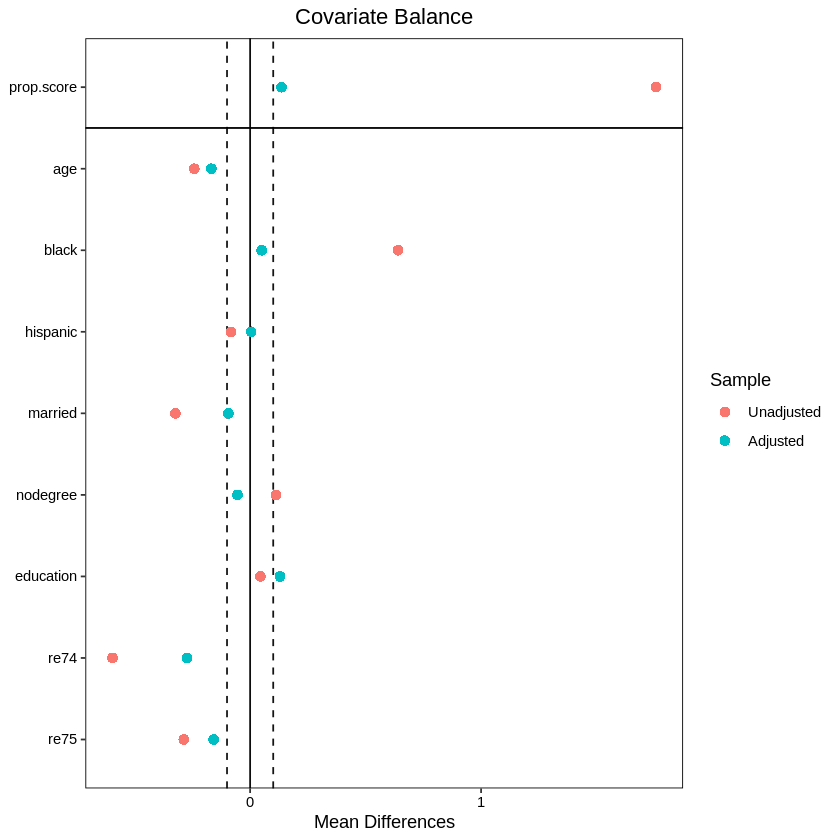

In [64]:
# cps3_nsw_dataでも効果推定
weghiting3 <- weightit(data=cps3_nsw_data,
formula = treat ~ age + black + hispanic + married +
  nodegree + education + re74 + re75,
  method="ps",
  estimand="ATE")

# 共変量のバランスを確認
love.plot(weghiting3, threshold=0.1)

IPW_result3 <- lm(data=cps3_nsw_data,
formula=re78 ~ treat + age + black + hispanic + married +
  nodegree + education + re74 + re75,
  weight=weghiting3$weights) %>%
    tidy()

print(IPW_result3)

# cps1_nsw_data1に比べるとバランシングも推定結果もまともだが、
# マッチングと比べると全然ダメ
# 介入群と対照群の傾向の違いが影響していると思われる。

Warning message:
“Some extreme weights were generated. Examine them with `summary()` and maybe trim them with `trim()`.”
Warning message:
“Standardized mean differences and raw mean differences are present in the same plot. 
Use the `stars` argument to distinguish between them and appropriately label the x-axis.”


# A tibble: 10 × 5
   term         estimate std.error statistic  p.value
   <chr>           <dbl>     <dbl>     <dbl>    <dbl>
 1 (Intercept)  2026.     523.        3.88   1.06e- 4
 2 treat        1208.     107.       11.3    2.47e-29
 3 age           -29.2      6.52     -4.48   7.65e- 6
 4 black       -1481.     183.       -8.11   5.32e-16
 5 hispanic      -87.7    281.       -0.312  7.55e- 1
 6 married         5.46   153.        0.0357 9.71e- 1
 7 nodegree       22.5    169.        0.134  8.94e- 1
 8 education     422.      32.3      13.1    9.62e-39
 9 re74            0.101    0.0161    6.27   3.80e-10
10 re75            0.346    0.0232   14.9    1.03e-49


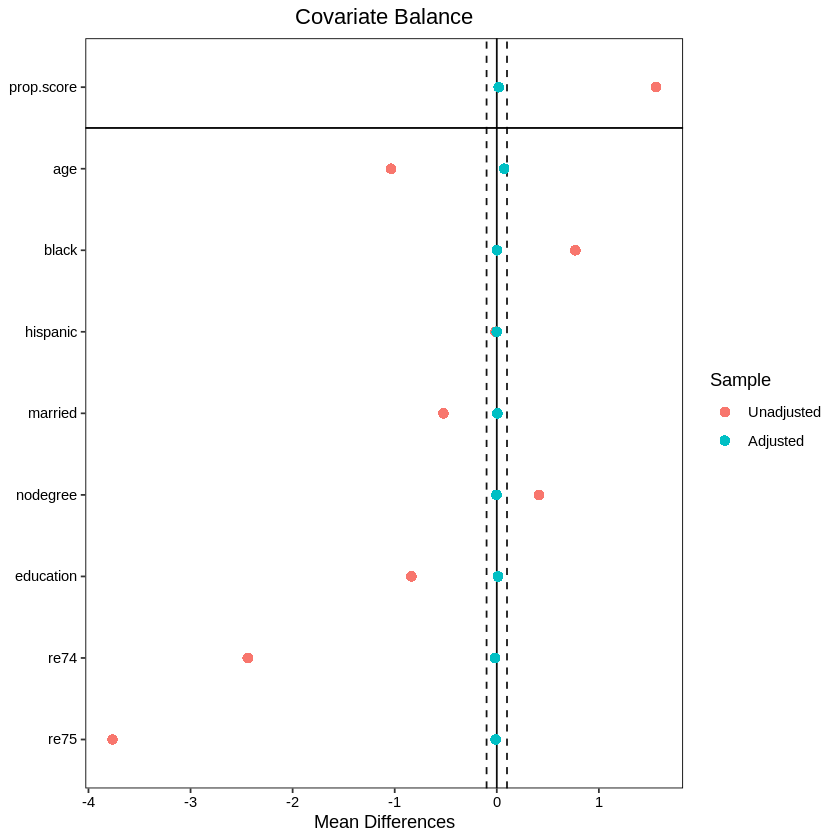

In [65]:
# cps1_nsw_dataで効果推定
# 対照群の分布を介入群に合わせにいくイメージ。なので重みは、介入群は1、対照群は(傾向スコア)/(1-(傾向スコア))。
weghiting1_att <- weightit(data=cps1_nsw_data,
formula = treat ~ age + black + hispanic + married +
  nodegree + education + re74 + re75,
  method="ps",
  estimand="ATT")

# 共変量のバランスを確認
love.plot(weghiting1_att, threshold=0.1)

IPW_result1_att <- lm(data=cps1_nsw_data,
formula=re78 ~ treat + age + black + hispanic + married +
  nodegree + education + re74 + re75,
  weight=weghiting1_att$weights) %>%
    tidy()

print(IPW_result1_att)

# バランシングはかなり良く、推定結果も大きく改善
# やっぱりデータ自体の背景に合わせて、アルゴリズムを選ぶことが重要